# Урок 4. Структури даних II
## Частина 2. Класичні алгоритми на графах
Найкоротший шлях у графі
Задані n вершин графа (вузлів мережі) $ v_1, v_2, \ ldots, v_n $ і позитивні цілі довжини дуг $ d_ {ij} = d (v_i, v_j) $ між ними. Потрібно для всіх $ k \ in \ {2, \ ldots, n \} $ знайти мінімальну довжину шляху з $ v_1 $ в $ v_k $.

Для початку подивимося, як ми самі могли б реалізувати клас "неорієнтовані граф"

In [ ]:
class UndirectedGraph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)
        self.edges[value] = []
        
    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance
        self.distances[(to_node, from_node)] = distance

Алгоритм Дейкстри грунтується на тому простому факті, що якщо у нас є найкоротший шлях від v до w, що проходить через вершину y, назвемо його $ (v \ rightarrow w) ^ {*} $, то його перша частина від v до y, $ (v \ rightarrow y) ^ {*} $ теж буде найкоротшим шляхом.

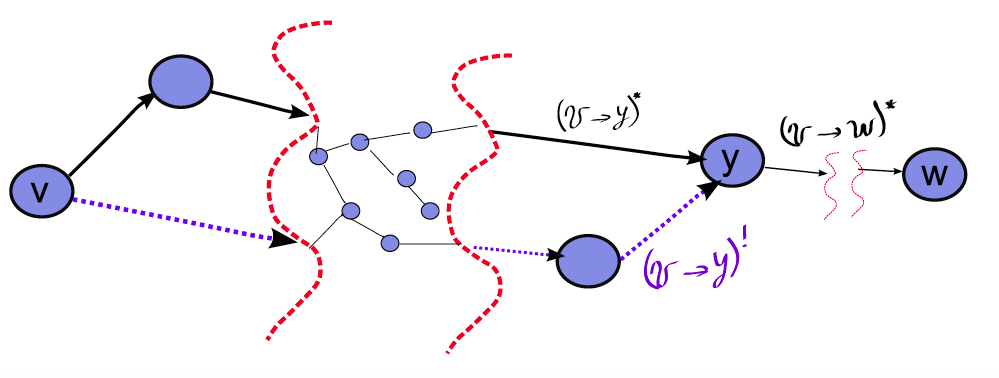

In [1]:
from IPython.display import Image
Image("C:/Users/XTreme.ws/Desktop/Python/test34.png")

Завдання з подібними властивостями, коли оптимальне рішення можна легко отримати з оптимальних рішень підзадач, зазвичай добре вирішуються так званими "жадібними алгоритмами". Алгоритм Дейкстри - якраз один їх прикладів. Його складність при використанні min-купи - $ O (| E | + | V | log | V |) $, де | E |, | V | - число дуг і вершин відповідно

In [2]:
def dijsktra(graph, initial):
    visited = {initial: 0}
    path = {}

    nodes = graph.nodes

    while nodes: 
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node

        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for edge in G.edges[min_node]:
            weight = current_weight + graph.distances[(min_node, edge)]
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge] = min_node

    return visited, path

In [10]:
G = UndirectedGraph()
for node in range(1,8):
    G.add_node(node)
for edge in [(1,7,15),(1,3,6),(1,5,7),
            (1,6,6),(1,2,4),(2,4,10),
            (3,5,10),(3,7,5),(3,6,5),
            (4,7,3),(4,5,15),(5,6,5)]:
    G.add_edge(*edge)
    
print(G.edges)
print(G.distances)
    
dijsktra(G, 1)

NameError: name 'UndirectedGraph' is not defined

Populating the interactive namespace from numpy and matplotlib


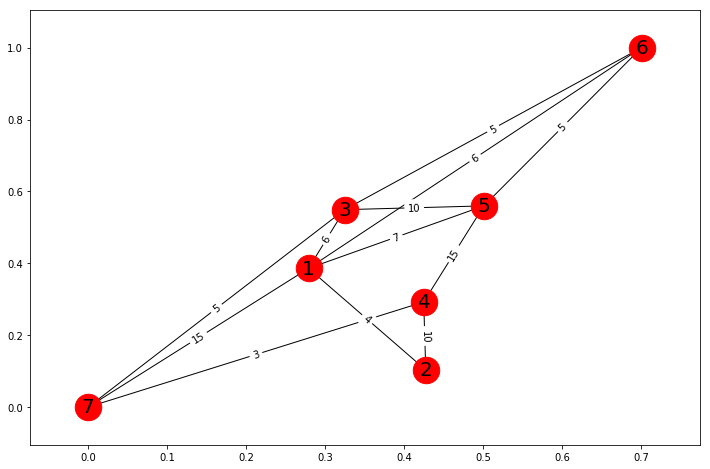

In [9]:
%pylab inline
figsize(12, 8)

import networkx as nx

G=nx.Graph()
G.add_nodes_from(range(1,8))
G.add_weighted_edges_from([(1,7,15),(1,3,6),(1,5,7),
                           (1,6,6),(1,2,4),(2,4,10),
                           (3,5,10),(3,7,5),(3,6,5),
                           (4,7,3),(4,5,15),(5,6,5)])

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

# edges
edges = [(u,v) for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edgelist=edges, font_size=16)

# edge labels
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

show() # matplotlib.pyplot.show()

Реалізація за допомогою купи

In [11]:
import heapq

def dijkstra(adj, costs, s, t):
    ''' Return predecessors and min distance if there exists a shortest path 
        from s to t; Otherwise, return None '''
    Q = []     # priority queue of items; note item is mutable.
    d = {s: 0} # vertex -> minimal distance
    Qd = {}    # vertex -> [d[v], parent_v, v]
    p = {}     # predecessor
    visited_set = set([s])

    for v in adj.get(s, []):
        d[v] = costs[s, v]
        item = [d[v], s, v]
        heapq.heappush(Q, item)
        Qd[v] = item

    while Q:
#         print(Q)
        cost, parent, u = heapq.heappop(Q)
        if u not in visited_set:
#             print('visit:', u)
            p[u]= parent
            visited_set.add(u)
            if u == t:
                return p, d[u]
            for v in adj.get(u, []):
                if d.get(v):
                    if d[v] > costs[u, v] + d[u]:
                        d[v] =  costs[u, v] + d[u]
                        Qd[v][0] = d[v]    # decrease key
                        Qd[v][1] = u       # update predecessor
                        heapq._siftdown(Q, 0, Q.index(Qd[v]))
                else:
                    d[v] = costs[u, v] + d[u]
                    item = [d[v], u, v]
                    heapq.heappush(Q, item)
                    Qd[v] = item

    return None

def make_undirected(cost):
    ucost = {}
    for k, w in cost.items():
        ucost[k] = w
        ucost[(k[1],k[0])] = w
    return ucost

In [12]:
# adjacent list
adj = { 1: [2, 3, 5, 7],
        2: [1, 4],
        3: [1, 5, 6,7],
        4: [2, 5, 7],
        5: [1, 3, 4, 6],
        6: [3, 5],
        7: [1, 3, 4]}
    
# edge costs
edges = {(1, 2): 4, (4, 7): 3, (1, 3): 6, (4, 5): 15,
        (1, 5): 7, (1, 6): 6, (3, 6): 5, (1, 7): 15, 
        (5, 6): 5, (3, 7): 5, (2, 4): 10, (3, 5): 10}

edge_cost = make_undirected(edges)

source, target = 1, 7
predecessors, min_cost = dijkstra(adj, edge_cost, source, target)
c = target
path = [c]
print('Minimal cost from {0} to {1}: {2}'.format(source, target, min_cost))
while predecessors.get(c):
    path.insert(0, predecessors[c])
    c = predecessors[c]

print('shortest path from {0} to {1}: {2}'.format(source, target, path))

Minimal cost from 1 to 7: 11
shortest path from 1 to 7: [1, 3, 7]


Знаходження найкоротших шляхів за допомогою методів бібліотеки Networkx

In [13]:
help(nx.single_source_dijkstra)

Help on function single_source_dijkstra in module networkx.algorithms.shortest_paths.weighted:

single_source_dijkstra(G, source, target=None, cutoff=None, weight='weight')
    Compute shortest paths and lengths in a weighted graph G.
    
    Uses Dijkstra's algorithm for shortest paths.
    
    Parameters
    ----------
    G : NetworkX graph
    
    source : node label
       Starting node for path
    
    target : node label, optional
       Ending node for path
    
    cutoff : integer or float, optional
       Depth to stop the search. Only paths of length <= cutoff are returned.
    
    Returns
    -------
    distance,path : dictionaries
       Returns a tuple of two dictionaries keyed by node.
       The first dictionary stores distance from the source.
       The second stores the path from the source to that node.
    
    
    Examples
    --------
    >>> G=nx.path_graph(5)
    >>> length,path=nx.single_source_dijkstra(G,0)
    >>> print(length[4])
    4
    >>> print

In [14]:
nx.single_source_dijkstra(G, source=1)

({1: 0, 2: 4, 3: 6, 4: 14, 5: 7, 6: 6, 7: 11},
 {1: [1],
  2: [1, 2],
  3: [1, 3],
  4: [1, 2, 4],
  5: [1, 5],
  6: [1, 6],
  7: [1, 3, 7]})

In [15]:
nx.dijkstra_path(G,1,4)

[1, 2, 4]

Реалізація алгоритму Беллмана-Форда. Його складність $ O (| V || E |) $ (гірше, ніж у алгоритму Дейкстри), зате можна працювати з негативною вагою.

In [16]:
help(nx.bellman_ford)

Help on function bellman_ford in module networkx.algorithms.shortest_paths.weighted:

bellman_ford(G, source, weight='weight')
    Compute shortest path lengths and predecessors on shortest paths
    in weighted graphs.
    
    The algorithm has a running time of O(mn) where n is the number of
    nodes and m is the number of edges.  It is slower than Dijkstra but
    can handle negative edge weights.
    
    Parameters
    ----------
    G : NetworkX graph
       The algorithm works for all types of graphs, including directed
       graphs and multigraphs.
    
    source: node label
       Starting node for path
    
    weight: string, optional (default='weight')
       Edge data key corresponding to the edge weight
    
    Returns
    -------
    pred, dist : dictionaries
       Returns two dictionaries keyed by node to predecessor in the
       path and to the distance from the source respectively.
    
    Raises
    ------
    NetworkXUnbounded
       If the (di)graph contain

In [17]:
pred, dist = nx.bellman_ford(G, 1)
print(pred)
print(dist)

{1: None, 7: 3, 3: 1, 5: 1, 6: 1, 2: 1, 4: 2}
{1: 0, 7: 11, 3: 6, 5: 7, 6: 6, 2: 4, 4: 14}


Задані неорієнтовані граф з n вершин-міст, і $ d_ {ij} = d (v_i, v_j) $ - позитивні цілі відстані між містами. Чому дорівнює найменша можлива довжина Гамільтона циклу (кільцевого маршруту, проходя- ного по одному разу через усі міста)? Тобто потрібно знайти $$ min \ sum_ {i = 1} ^ {n-1} d_ {p_i, p_ {i + 1}} + d_ {p_n, p_1}, $$ де мінімум береться по всіх перестановок p чисел $ 1 , \ ldots, n $

In [19]:
from itertools import permutations

INFINITY = pow(10, 20)

def TSP_BruteForce(G, init_node_index):
    def get_path_length(path):
        path_length = 0
        for i, v1 in enumerate(path):
            v2 = path[ (i+1) % len(path)]
            if not G.has_edge(v1, v2):
                return INFINITY
            path_length += G[v1][v2]["weight"]
        return path_length
    
    def node_permutations(G, init_node_index):
        nodes = G.nodes()
        init_node = nodes[init_node_index]
        nodes.remove(init_node)
        return [[init_node] + list(a_tuple) 
                 for a_tuple in permutations(nodes)]
    
    min_path = min_path_length = None
    # перебор всех перестановок с фиксированным первым узлом
    for path in node_permutations(G, init_node_index):
        path_length = get_path_length(path)
        if not min_path or min_path_length > path_length:
            min_path, min_path_length = path, path_length
    return min_path, min_path_length

Populating the interactive namespace from numpy and matplotlib


C:\Users\XTreme.ws\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['source', 'dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


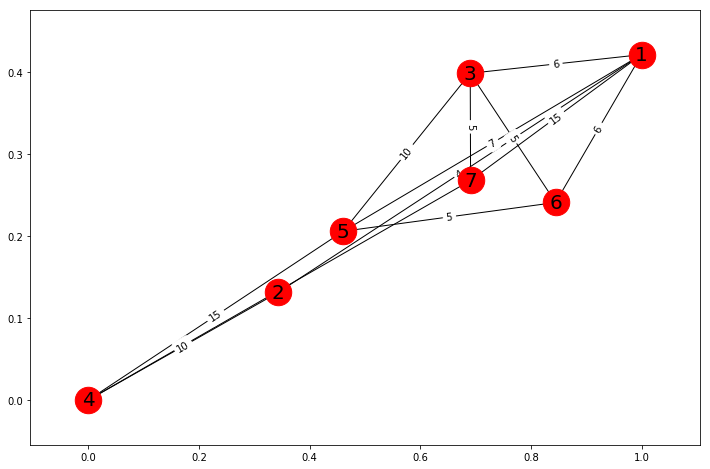

In [20]:
%pylab inline
figsize(12, 8)

import networkx as nx

G=nx.Graph()
G.add_nodes_from(range(1,8))
G.add_weighted_edges_from([(1,7,15),(1,3,6),(1,5,7),
                           (1,6,6),(1,2,4),(2,4,10),
                           (3,5,10),(3,7,5),(3,6,5),
                           (4,7,3),(4,5,15),(5,6,5)])

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

# edges
edges = [(u,v) for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edgelist=edges, font_size=16)

# edge labels
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

show() # matplotlib.pyplot.show()

Гамильтонов цикл з мінімальною сумою ваг ребер

In [21]:
"Оптимальный маршрут: {0}. Его стоимость = {1}".format(*TSP_BruteForce(G, 0))

'Оптимальный маршрут: [1, 2, 4, 7, 3, 6, 5]. Его стоимость = 39'

### Пошук в глибину
Пошук в глибину (англ. Depth-first search, DFS) - один з методів обходу графа. Стратегія пошуку в глибину, як і випливає з назви, полягає в тому, щоб йти "вглиб" графа, наскільки це можливо. Алгоритм пошуку описується рекурсивно: перебираємо всі вихідні з даної вершини ребра. Якщо ребро веде в вершину, яка не була розглянута раніше, то запускаємо алгоритм від цієї нерозглянутих вершини, а після повертаємося і продовжуємо перебирати ребра. Повернення відбувається в тому випадку, якщо в даній вершині не залишилося ребер, які ведуть в нерозглянутих вершину. Якщо після завершення алгоритму не всі вершини були розглянуті, то необхідно запустити алгоритм від однієї з нерозглянутих вершин.

Розглянемо на прикладі наступного неориентированного невиваженого графа

Populating the interactive namespace from numpy and matplotlib


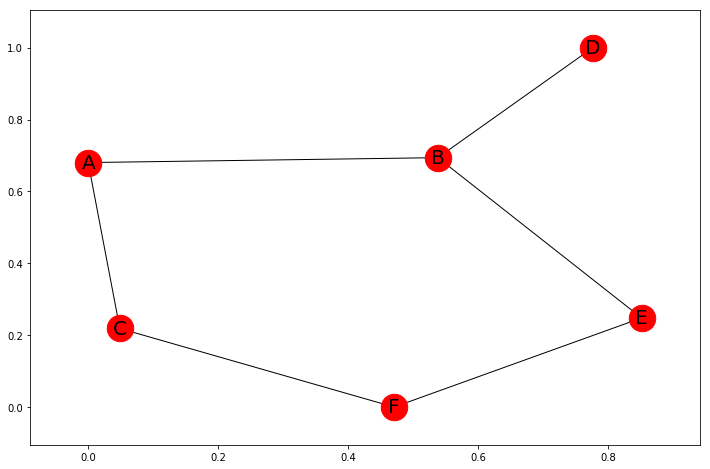

In [22]:
%pylab inline
figsize(12, 8)

import networkx as nx

G=nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A','B'),('A','C'),('B','D'),
                    ('B','E'),('C','F'), ('E','F')])

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), font_size=16)

show() # matplotlib.pyplot.show()

In [23]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    # adjacent to start - graph.adj[start].keys()
    for next in set(graph.adj[start].keys()) - visited:
        dfs(graph, next, visited)
    return visited

In [24]:
dfs(G, 'C')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [25]:
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in set(graph.adj[start].keys()) - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

In [26]:
list(dfs_paths(G, 'C', 'F'))

[['C', 'A', 'B', 'E', 'F'], ['C', 'F']]

### Пошук в ширину
Пошук в ширину (англ. Breadth-first search, BFS) - метод обходу графа і пошуку шляху в графі. Пошук в ширину працює шляхом послідовного перегляду окремих рівнів графа, починаючи з вузла-джерела $ u $.

Розглянемо всі ребра $ (u, v) $, що виходять з вузла $ u $. Якщо черговий вузол $ v $ є цільовим вузлом, то пошук завершується; в іншому випадку вузол $ v $ додається в чергу. Після того, як будуть перевірені всі ребра, що виходять з вузла $ u $, з черги витягується наступний вузол $ u $, і процес повторюється.

In [27]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in set(graph.adj[vertex].keys()) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

In [28]:
list(bfs_paths(G, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]